In [53]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [54]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
y_train.shape

(50000, 1)

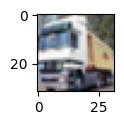

In [55]:
plt.figure(figsize = (10,1))
plt.imshow(X_train[1])

In [56]:
data = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.25,random_state=42)

Now the values will be normalised within a range between 0 & 1, which scales down all values and drastically imporves the performance of the model

In [58]:
X_train = X_train/255
X_test = X_test/255

In [59]:
X_train[0]

array([[[0.47058824, 0.4627451 , 0.25882353],
        [0.4627451 , 0.45490196, 0.25490196],
        [0.4745098 , 0.46666667, 0.26666667],
        ...,
        [0.49803922, 0.5254902 , 0.27058824],
        [0.48627451, 0.51372549, 0.25490196],
        [0.50196078, 0.5254902 , 0.27843137]],

       [[0.49411765, 0.48627451, 0.28235294],
        [0.48235294, 0.4745098 , 0.2745098 ],
        [0.47843137, 0.47058824, 0.27058824],
        ...,
        [0.49019608, 0.50980392, 0.2745098 ],
        [0.4745098 , 0.49803922, 0.25882353],
        [0.47843137, 0.50196078, 0.26666667]],

       [[0.49019608, 0.48235294, 0.28235294],
        [0.48627451, 0.47843137, 0.27843137],
        [0.49019608, 0.48235294, 0.28235294],
        ...,
        [0.4745098 , 0.49411765, 0.27843137],
        [0.48235294, 0.50196078, 0.28627451],
        [0.47843137, 0.49803922, 0.2745098 ]],

       ...,

       [[0.34901961, 0.33333333, 0.17254902],
        [0.34509804, 0.32941176, 0.16862745],
        [0.31764706, 0

Using an artificial nueral network

In [60]:
nueron = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(2500,activation ='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation = 'sigmoid')
])
nueron.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
nueron.fit(X_train,y_train,epochs=5)


Epoch 1/5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.2931 - loss: 1.9676
Epoch 2/5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4038 - loss: 1.6930
Epoch 3/5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4388 - loss: 1.5920
Epoch 4/5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4651 - loss: 1.5220
Epoch 5/5
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.4771 - loss: 1.4880


bad performance for the ann

In [61]:
from sklearn.metrics import classification_report
y_pred = nueron.predict(X_test)
y_preds_vals = [np.argmax(i) for i in y_pred]
print("\n",classification_report(y_test,y_preds_vals))

391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

               precision    recall  f1-score   support

           0       0.47      0.57      0.51      1235
           1       0.63      0.42      0.50      1212
           2       0.44      0.21      0.28      1270
           3       0.30      0.51      0.38      1291
           4       0.50      0.28      0.36      1182
           5       0.37      0.33      0.35      1263
           6       0.48      0.49      0.48      1219
           7       0.56      0.50      0.53      1259
           8       0.71      0.48      0.57      1280
           9       0.42      0.75      0.54      1289

    accuracy                           0.46     12500
   macro avg       0.49      0.45      0.45     12500
weighted avg       0.49      0.46      0.45     12500



In [85]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [86]:
cnn.compile(optimizer = 'adam',
           loss='sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [96]:
keras.callbacks.EarlyStopping(moniter='val_loss',patience=5,restore_best_weights = True)
keras.callbacks.ReduceLROnPlateau(moniter='val_loss',factor=0.5,patience=3,verbose=1)
cnn.fit(X_train,y_train,epochs=13,batch_size=64)

NameError: name 'keras' is not defined

In [88]:
print("perfomance with ann: ",nueron.evaluate(X_test,y_test),"\n")
print("perfomance with cnn: ",cnn.evaluate(X_test,y_test))

391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4475 - loss: 1.5246
perfomance with ann:  [1.515270471572876, 0.4561600089073181] 

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6790 - loss: 1.0180
perfomance with cnn:  [1.0373225212097168, 0.6747199892997742]


As we can see the cnn gives a much better accuracy than the ann

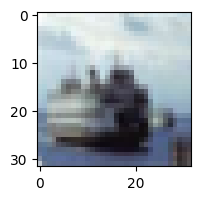

In [89]:
plt.figure(figsize=(5,2))

plt.imshow(X_test[6])

In [90]:
y_pred = cnn.predict(X_test)
y_preds = [np.argmax(i) for i in y_pred]
print("predicted values",y_preds[5:10])
print("actual values",y_test[5:10].reshape(-1))

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predicted values [6, 8, 0, 6, 1]
actual values [6 8 0 6 5]


In [91]:
data[y_preds[6]]

'ship'

In [92]:
from sklearn.metrics import classification_report
print('\n',classification_report(y_test,y_preds))


               precision    recall  f1-score   support

           0       0.72      0.71      0.71      1235
           1       0.83      0.80      0.81      1212
           2       0.59      0.58      0.58      1270
           3       0.55      0.35      0.43      1291
           4       0.56      0.68      0.61      1182
           5       0.74      0.35      0.48      1263
           6       0.58      0.87      0.70      1219
           7       0.74      0.77      0.75      1259
           8       0.68      0.88      0.77      1280
           9       0.81      0.78      0.79      1289

    accuracy                           0.67     12500
   macro avg       0.68      0.68      0.66     12500
weighted avg       0.68      0.67      0.66     12500

